In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from plot_metric.functions import BinaryClassification
from sklearn.metrics import accuracy_score, precision_score, f1_score,roc_auc_score

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data_final.csv')

### Train and Test data

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
Y = data['target'].astype(int)
X = data.drop('target',axis=1)

### Cross validation

In [5]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer
scoring = ['accuracy', 'precision', 'f1','roc_auc']

### Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier 

In [7]:
clf = RandomForestClassifier()
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)

accuracy_rf = scores['test_accuracy'].mean()
precision_rf = scores['test_precision'].mean()
f1_rf = scores['test_f1'].mean()
roc_rf = scores['test_roc_auc'].mean()

/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/quant/anaconda3/lib/python3.7/site-package

### Support Vector Classifier

In [8]:
from sklearn.svm import SVC

In [9]:
clf = SVC()
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)

accuracy_svm = scores['test_accuracy'].mean()
precision_svm = scores['test_precision'].mean()
f1_svm = scores['test_f1'].mean()
roc_svm = scores['test_roc_auc'].mean()

/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clf = LogisticRegression()
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)

accuracy_lr = scores['test_accuracy'].mean()
precision_lr = scores['test_precision'].mean()
f1_lr = scores['test_f1'].mean()
roc_lr = scores['test_roc_auc'].mean()

/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/quant/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

## Deep Learning Models

In [12]:
from sklearn.model_selection import KFold
X = X.values
Y = Y.values
kf = KFold(n_splits=2)

### Multilayer Perceptron

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                96        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 14        
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
12431/12431 [==============================] - 0s 35us/step - loss: 0.4261 - accuracy: 0.8603
Epoch 2/10
12431/12431 [==============================] - 0s 27us/step - loss: 0.2755 - accuracy: 0.9252
Epoch 3/10
12431/12431 [==============================] - 0s 29us/step - loss: 0.2305 - accuracy: 0.9345
Epoch 4/10
12431/12431 [==============================] - 0s 29us/

AttributeError: module 'numpy' has no attribute 'meanprecision_mlp'

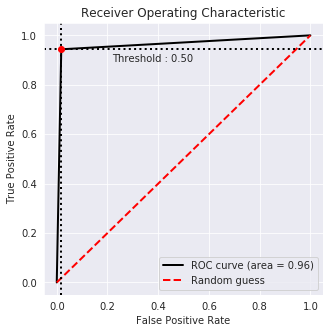

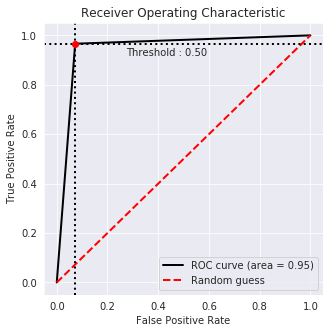

In [16]:
from keras.models import Sequential
from keras.layers import Dense

accuracy_mlp = []
precision_mlp= []
f1_mlp = []
roc_mlp = []


for train, test in kf.split(X):
    X_train = X[train]
    X_test = X[test]
    y_train = Y[train]
    y_test = Y[test]

    # Build the model.
    model = Sequential([
      Dense(12, activation='relu', input_shape=(X.shape[1],)),
      Dense(6, activation='relu'),
      Dense(2, activation='softmax'),
    ])

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    print(model.summary())

    # Train the model.
    model.fit(
      X_train,
      to_categorical(y_train),
      epochs=10,
      batch_size=32,
    )

    # Evaluate the model.
    score = model.evaluate(
      X_test,
      to_categorical(y_test)
    )

    y_pred_dl = model.predict(X_test)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    y_pred= np.argmax(y_pred_dl,axis=1)
    accuracy_mlp.append(accuracy_score(y_test,y_pred))
    precision_mlp.append(precision_score(y_test,y_pred))
    f1_mlp.append(f1_score(y_test,y_pred))
    roc_mlp.append(roc_auc_score(y_test,y_pred))
    
    # Visualisation with plot_metric
    bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

    # Figures
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    
accuracy_mlp = np.mean(accuracy_mlp)
precision_mlp= np.mean(precision_mlp)
f1_mlp = np.mean(f1_mlp)
roc_mlp = np.mean(roc_mlp)

### Convolutional Neural Network

In [18]:
X_train_DL = X_train.values.reshape((-1,1,7))
X_test_DL = X_test.values.reshape((-1,1,7))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 1, 12)             96        
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 1, 10)             130       
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 10)             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 7)                 77        
_________________________________________________________________
dropout_12 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)               

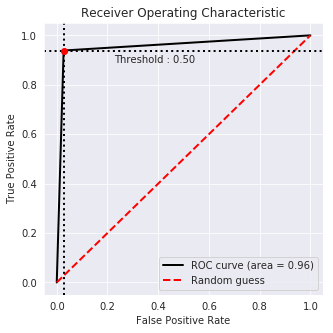

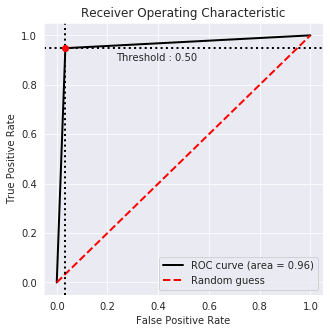

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling2D
from keras import backend as K

batch_size = 10
num_classes = 2
epochs = 10
input_shape = (1, 7)

accuracy_cnn = []
precision_cnn= []
f1_cnn = []
roc_cnn = []


for train, test in kf.split(X):
    X_train = X[train]
    X_test = X[test]
    y_train = Y[train]
    y_test = Y[test]

    X_train = X_train.reshape((-1,1,7))
    X_test = X_test.reshape((-1,1,7))

    model = Sequential()
    model.add(Conv1D(12, kernel_size=(1),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv1D(10, (1), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(7, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    print(model.summary())

    model.fit(X_train, to_categorical(y_train),
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              )
    score = model.evaluate(X_test, to_categorical(y_test), verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    y_pred_dl = model.predict(X_test)
    
    y_pred= np.argmax(y_pred_dl,axis=1)
    accuracy_cnn.append(accuracy_score(y_test,y_pred))
    precision_cnn.append(precision_score(y_test,y_pred))
    f1_cnn.append(f1_score(y_test,y_pred))
    roc_cnn.append(roc_auc_score(y_test,y_pred))
    
    # Visualisation with plot_metric
    bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

    # Figures
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    
accuracy_cnn = np.mean(accuracy_cnn)
precision_cnn= np.mean(precision_cnn)
f1_cnn = np.mean(f1_cnn)
roc_cnn = np.mean(roc_cnn)
    

### Recurrent Neural Network

Epoch 1/10
12431/12431 [==============================] - 8s 629us/step - loss: 0.2661 - accuracy: 0.9000
Epoch 2/10
12431/12431 [==============================] - 6s 513us/step - loss: 0.1747 - accuracy: 0.9397
Epoch 3/10
12431/12431 [==============================] - 7s 525us/step - loss: 0.1577 - accuracy: 0.9430
Epoch 4/10
12431/12431 [==============================] - 7s 533us/step - loss: 0.1456 - accuracy: 0.9443
Epoch 5/10
12431/12431 [==============================] - 7s 551us/step - loss: 0.1385 - accuracy: 0.9468
Epoch 6/10
12431/12431 [==============================] - 6s 512us/step - loss: 0.1274 - accuracy: 0.9499
Epoch 7/10
12431/12431 [==============================] - 6s 506us/step - loss: 0.1226 - accuracy: 0.9506
Epoch 8/10
12431/12431 [==============================] - 6s 499us/step - loss: 0.1147 - accuracy: 0.9528
Epoch 9/10
12431/12431 [==============================] - 7s 536us/step - loss: 0.1083 - accuracy: 0.9561
Epoch 10/10
12431/12431 [=====================

KeyboardInterrupt: 

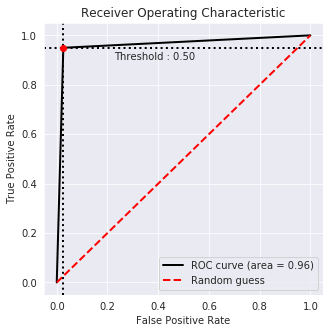

In [25]:
from keras.layers import GRU, SimpleRNN, Dense

epochs = 10


accuracy_rnn = []
precision_rnn= []
f1_rnn = []
roc_rnn = []


for train, test in kf.split(X):
    X_train = X[train]
    X_test = X[test]
    y_train = Y[train]
    y_test = Y[test]
    
    X_train = X_train.reshape((-1,1,7))
    X_test = X_test.reshape((-1,1,7))

    model1 = Sequential()

    # The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 15)
    model1.add(GRU(15, return_sequences=True))

    # The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 15)
    model1.add(GRU(15, return_sequences=True))

    # The output of SimpleRNN will be a 2D tensor of shape (batch_size, 12)
    model1.add(SimpleRNN(12))

    model1.add(Dense(2, activation='softmax'))
    model1.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])


    model1.fit(X_train, to_categorical(y_train),
              batch_size=batch_size,
              epochs=epochs,
              verbose=1)
    print(model1.summary())

    score = model1.evaluate(X_test, to_categorical(y_test), verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    y_pred_dl = model.predict(X_test)
    
    y_pred= np.argmax(y_pred_dl,axis=1)
    accuracy_rnn.append(accuracy_score(y_test,y_pred))
    precision_rnn.append(precision_score(y_test,y_pred))
    f1_rnn.append(f1_score(y_test,y_pred))
    roc_rnn.append(roc_auc_score(y_test,y_pred))
    
    # Visualisation with plot_metric
    bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

    # Figures
    plt.figure(figsize=(5,5))
    bc.plot_roc_curve()
    
accuracy_rnn = accuracy_cnn.mean()
precision_rnn= precision_cnn.mean()
f1_rnn = f1_cnn.mean()
roc_rnn = roc_cnn.mean()

In [25]:
#metric values for random forest
accuracy_rf, precision_rf, f1_rf 

(0.9968494436251508, 0.9987775061124694, 0.9964174098635566)

In [26]:
#metric values for SVM
accuracy_svm, precision_svm, f1_svm

(0.9480493363721678, 0.8994490358126722, 0.9439826526924467)

In [27]:
#metric values for logistic regression
accuracy_lr, precision_lr, f1_lr

(0.9843812843544711, 0.9813296903460837, 0.9822988680392007)

In [28]:
#metric values for MLP
accuracy_mlp, precision_mlp, f1_mlp 

(0.9843812843544711, 0.9813296903460837, 0.9822988680392007)

In [29]:
#metric values for CNN
accuracy_cnn, precision_cnn, f1_cnn

(0.9495910980024131, 0.9485441380372824, 0.9424460431654675)

In [30]:
#metric values for RNN
accuracy_rnn, precision_rnn, f1_rnn 

(0.9634669526746212, 0.9761528742893241, 0.9577748508561247)

In [32]:
roc_rf, roc_svm, roc_lr, roc_mlp, roc_cnn, roc_rnn

((array([0.0000000e+00, 9.5888769e-04, 1.0000000e+00]),
  array([0.        , 0.99406844, 1.        ]),
  array([2, 1, 0])),
 (array([0.       , 0.0874985, 1.       ]),
  array([0.        , 0.99315589, 1.        ]),
  array([2, 1, 0])),
 (array([0.       , 0.0147429, 1.       ]),
  array([0.        , 0.98326996, 1.        ]),
  array([2, 1, 0])),
 (array([0.       , 0.0147429, 1.       ]),
  array([0.        , 0.98326996, 1.        ]),
  array([2, 1, 0])),
 (array([0.        , 0.04003356, 1.        ]),
  array([0.        , 0.93642586, 1.        ]),
  array([2, 1, 0])),
 (array([0.        , 0.01809901, 1.        ]),
  array([0.        , 0.94007605, 1.        ]),
  array([2, 1, 0])))